# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

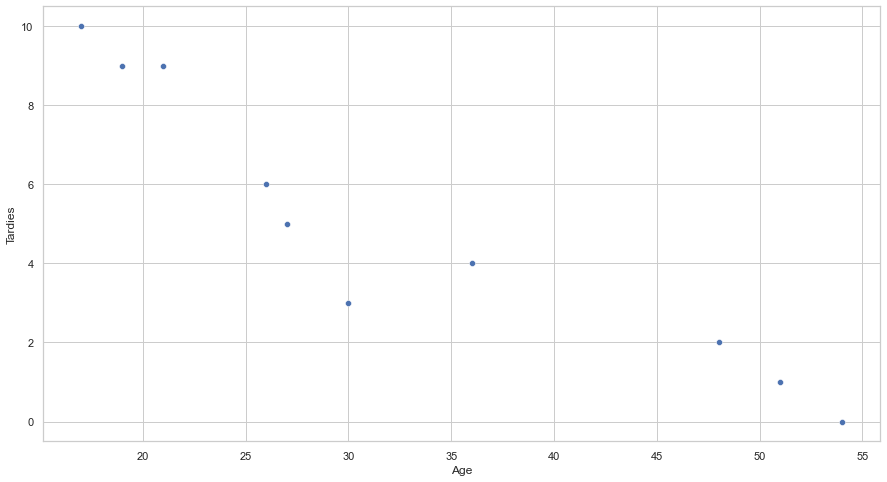

In [3]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

the younger my students are, the more often they are late to class. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [5]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


both measures indicate "AGE" variable follows the opposite pattern as "Tardies" variable.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Plot your regression model on your scatter plot.

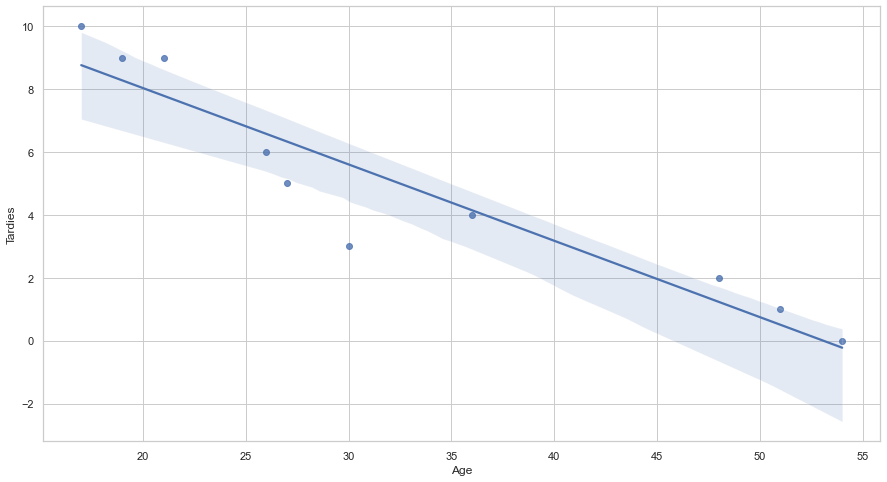

In [6]:
sns.regplot(x="Age", y="Tardies", data=student_data);

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(
    X = student_data[["Age"]], #hours, DATAFRAME
    y = student_data["Tardies"] # grade, Series
)

LinearRegression()

In [9]:
beta_0 = lr.intercept_ # where it crosses the Y axis: N
beta_0

12.888803363135768

In [10]:
beta_1 = lr.coef_[0] # slope, what multiplies the X: M
beta_1

-0.2428207709159808

In [11]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"beta_0: {beta_0}, which is the intercept\nbeta_1: {beta_1}, which is the slope or coef_[0]")

beta_0: 12.888803363135768, which is the intercept
beta_1: -0.2428207709159808, which is the slope or coef_[0]


In [12]:
student_data2 = student_data.copy()

In [13]:
student_data2["prediction_through_lr_scikitlearn"] = (student_data2.Age * beta_1) + beta_0
student_data2

,Age,Tardies,prediction_through_lr_scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


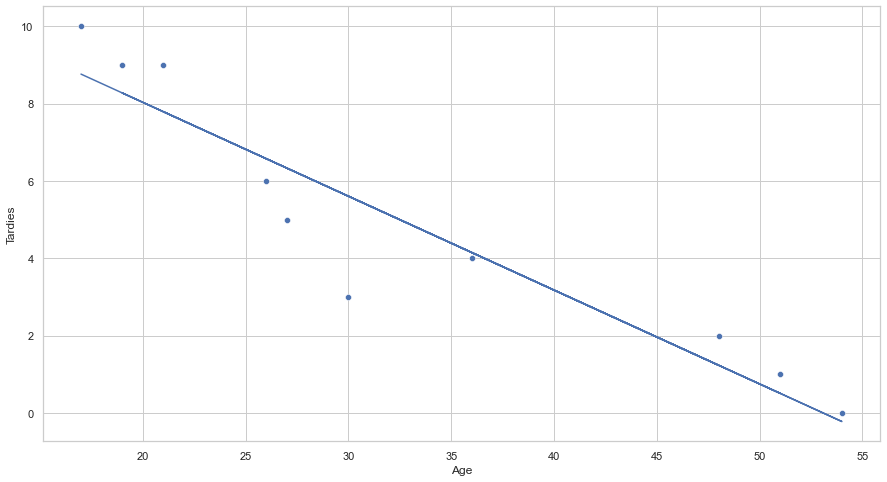

In [14]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);
plt.plot(student_data2["Age"], student_data2["prediction_through_lr_scikitlearn"]);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

visually, my model follows the tendency of the data. 

In [15]:
from sklearn import metrics

In [16]:
mae = metrics.mean_absolute_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)
mse = metrics.mean_squared_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)
rmse = np.sqrt(metrics.mean_squared_error(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn))
r2 = metrics.r2_score(student_data2.Tardies, student_data2.prediction_through_lr_scikitlearn)

In [17]:
mae

0.9319083427082717

In [18]:
mse

1.3319201847356268

In [19]:
rmse

1.1540884648655088

In [20]:
r2

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
vehicles = pd.read_csv("../lab-regression-analysis/vehicles.csv", index_col=0)

In [22]:
vehicles.sample()

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
Chevrolet,K1500 Pickup 4WD,1991,6.2,8.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks,Diesel,23.886563,15,19,16,636.25,2250


In [23]:
vehicles2 = vehicles.drop(['Model', 'Engine Displacement','Transmission', 'Drivetrain', 'Vehicle Class', 'City MPG', 'Highway MPG', 'Fuel Type' ], axis=1)

In [24]:
vehicles2

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,
AM General,1984,4.0,19.388824,17,522.764706,1950
AM General,1984,6.0,25.354615,13,683.615385,2550
AM General,1985,4.0,20.600625,16,555.437500,2100
AM General,1985,6.0,25.354615,13,683.615385,2550
ASC Incorporated,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...
smart,2013,3.0,9.155833,36,244.000000,1100
smart,2014,3.0,9.155833,36,243.000000,1100
smart,2015,3.0,9.155833,36,244.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [25]:
vehicles2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


Fuel Cost/Year and Fuel Barrels/Year positivily and Combined MPG nagatively	

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [26]:
results = smf.ols("vehicles2['CO2 Emission Grams/Mile'] ~ vehicles2['Fuel Barrels/Year'] + vehicles2['Year'] + vehicles2['Cylinders'] + vehicles2['Combined MPG'] + vehicles2['Fuel Cost/Year']", data=vehicles2).fit()

In [27]:
results

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     vehicles2['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                              OLS   Adj. R-squared:                  0.981
Method:                                   Least Squares   F-statistic:                 3.687e+05
Date:                                  Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                          16:35:41   Log-Likelihood:            -1.5173e+05
No. Observations:                                 35952   AIC:                         3.035e+05
Df Residuals:                                     35946   BIC:                         3.035e+05
Df Model:                                             5                                         
Covariance Type:                              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        769.8883     19.392     39.702      0.000     731.880     807.897
vehicles2['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles2['Year']                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
vehicles2['Cylinders']             1.8788      0.083     22.598      0.000       1.716       2.042
vehicles2['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
vehicles2['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
data = [[1, 1], [3, 2], [4, 4], [6, 4], [8, 5],[9, 7], [11, 8], [14, 13]]
  
df = pd.DataFrame(data, columns=['X', 'Y'])
  
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

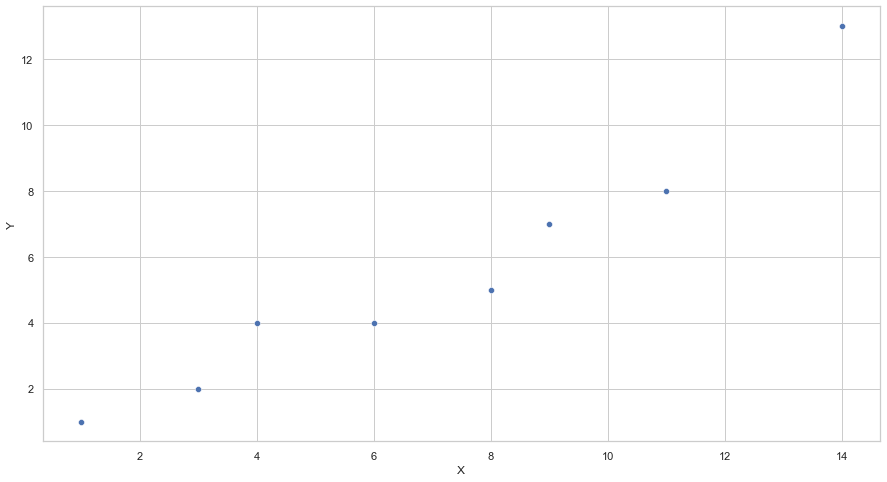

In [36]:
sns.scatterplot(x=df["X"], y=df["Y"]);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

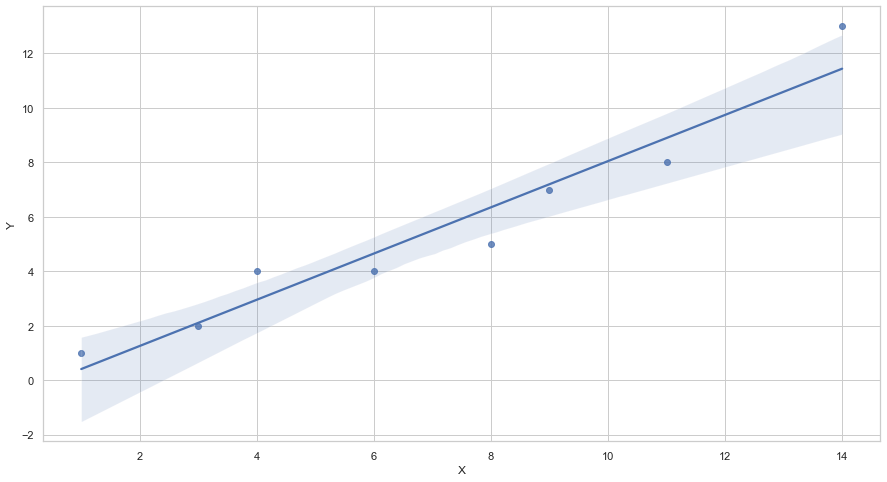

In [48]:
sns.regplot(x="X", y="Y", data=df,ci=95);

In [53]:
df.corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [50]:
data2 = [[1, 1], [3, 2], [6, 4],[9, 7], [11, 8]]
  
df2 = pd.DataFrame(data2, columns=['X', 'Y'])
  
df2

,X,Y
0,1,1
1,3,2
2,6,4
3,9,7
4,11,8


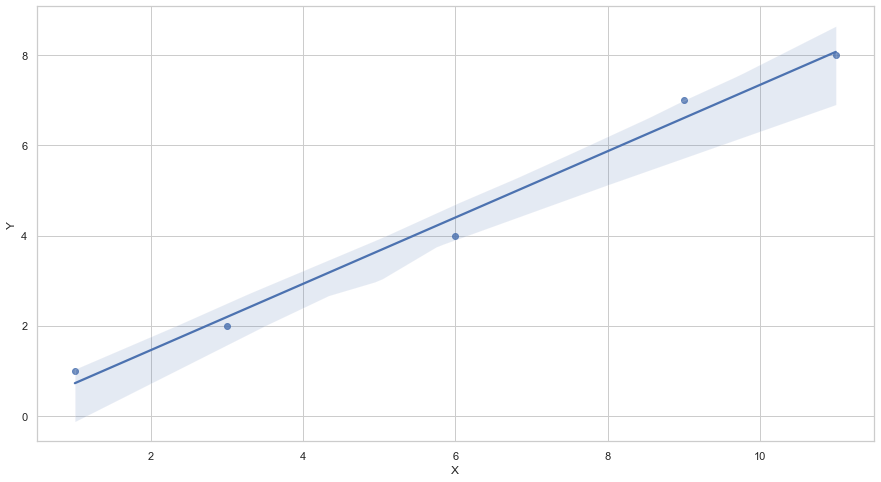

In [51]:
sns.regplot(x="X", y="Y", data=df2,ci=95);

In [54]:
df2.corr()

,X,Y
X,1.000000,0.994132
Y,0.994132,1.000000


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

as we can see, in the second model (without the outliers), the correlation is higher.